In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier

In [18]:
from sqlalchemy import create_engine

In [11]:
import json 
import folium

In [12]:
df_apart = pd.read_csv('dados_apartamentos.csv', encoding = "utf-8", sep=';', header=0)
df_houses = pd.read_csv('houses_dados.csv', encoding = "utf-8", sep=';', header=0) 

In [13]:
df_apart.rename({'#quartos': 'quartos'}, axis=1, inplace=True)
df_houses.rename({'#quartos': 'quartos'}, axis=1, inplace = True)

In [6]:
df_apart.head()

,entry_date,property_type,Tipology,Condition,Location,Price,areas_sqm,euros/sqm,Latitude,Longitude,Location_2,CodPostal,quartos,Cod_Condition
0,20/07/2020,Apartments,T2,Used,"Aveiro, Aradas",145000,96,1518,40.6175,-8.647778,Aradas,3810,2,4
1,20/07/2020,Apartments,T2,Used,"Aveiro, Aradas",155000,119,1303,40.6175,-8.647778,Aradas,3810,2,4
2,20/07/2020,Apartments,T2,Used,"Aveiro, Aradas",118000,72,1639,40.6175,-8.647778,Aradas,3810,2,4
3,20/07/2020,Apartments,T2,Used,"Aveiro, Aradas",185000,90,2056,40.6175,-8.647778,Aradas,3810,2,4
4,20/07/2020,Apartments,T2,New,"Aveiro, Aradas",295000,126,2351,40.6175,-8.647778,Aradas,3810,2,6


In [12]:
df_houses.head()

,entry_date,property_type,Tipology,Condition,Location,Price,areas_sqm,euros/sqm,Latitude,Longitude,Location_2,CodPostal,#quartos,Cod_Condition
0,21/02/2021,Houses,T4,Used,"Ílhavo, Gafanha da Encarnação",570000,175,3257,40.621371,-8.733032,Gafanha da Encarnação,3830,4,4
1,21/02/2021,Houses,T3,Used,"Ílhavo, Gafanha da Encarnação",320000,258,1240,40.621371,-8.733032,Gafanha da Encarnação,3830,3,4
2,21/02/2021,Houses,T3,Used,"Ílhavo, Gafanha da Encarnação",315000,140,2250,40.621371,-8.733032,Gafanha da Encarnação,3830,3,4
3,21/02/2021,Houses,T4,Used,"Ílhavo, Gafanha da Encarnação",237000,194,1222,40.621371,-8.733032,Gafanha da Encarnação,3830,4,4
4,21/02/2021,Houses,T4,Used,"Ílhavo, Gafanha da Encarnação",580000,193,3005,40.621371,-8.733032,Gafanha da Encarnação,3830,4,4


### explore

In [7]:
df_apart.columns

Index(['entry_date', 'property_type', 'Tipology', 'Condition', 'Location',
       'Price', 'areas_sqm', 'euros/sqm', 'Latitude', 'Longitude',
       'Location_2', 'CodPostal', 'quartos', 'Cod_Condition'],
      dtype='object')

In [8]:
df_apart.CodPostal.value_counts()

3800    2298
3830     834
3810     511
3880      11
Name: CodPostal, dtype: int64

In [14]:
frames = [df_apart, df_houses]

In [15]:
#unir dataframes
df = pd.concat(frames)

In [17]:
df.tail()

,entry_date,property_type,Tipology,Condition,Location,Price,areas_sqm,euros/sqm,Latitude,Longitude,Location_2,CodPostal,quartos,Cod_Condition
521,01/12/2020,Houses,T3,Used,"Aveiro, Póvoa do Paço",50000,151,331,41.0,9.0,Póvoa do Paço,3800,3,4
522,14/11/2020,Houses,T5,Used,"Aveiro, Mataduços",230000,127,1811,41.0,9.0,Mataduços,3800,5,4
523,01/12/2020,Houses,T4,Used,"Aveiro, Póvoa do Paço",100000,270,370,41.0,9.0,Póvoa do Paço,3800,4,4
524,23/12/2020,Houses,T4,Used,"Ílhavo, São Salvador",300000,126,2381,41.0,9.0,São Salvador,3830,4,4
525,24/11/2020,Houses,T3,Used,"Aveiro, Azenha de Baixo",295000,180,1639,41.0,9.0,Azenha de Baixo,3810,3,4


In [19]:
engine = create_engine('sqlite:///casas.db')
df.to_sql('casas', engine, index=False)

#### apartamentos

In [28]:
quartos_apart = df_apart.quartos.value_counts()

<AxesSubplot:>

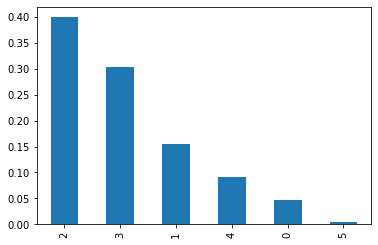

In [34]:
(quartos_apart/df_apart.shape[0]).plot(kind='bar')#numero de quartos em %

<AxesSubplot:xlabel='quartos'>

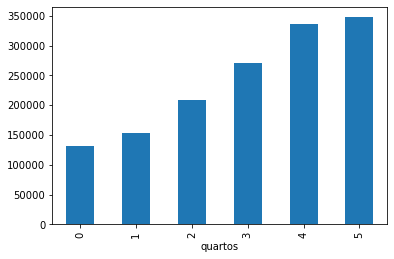

In [41]:
price_by_room_apart = df_apart.groupby(['quartos']).mean()['Price'].sort_values()
price_by_room_apart.plot(kind='bar')

<AxesSubplot:xlabel='Condition'>

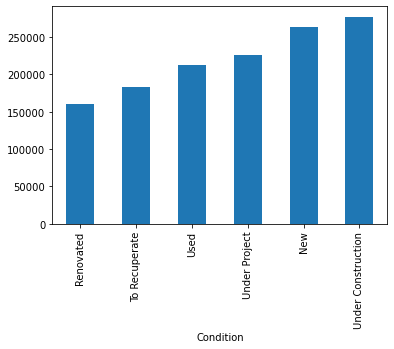

In [43]:
price_by_condition_apart = df_apart.groupby(['Condition']).mean()['Price'].sort_values()
price_by_condition_apart.plot(kind='bar')

<AxesSubplot:xlabel='CodPostal'>

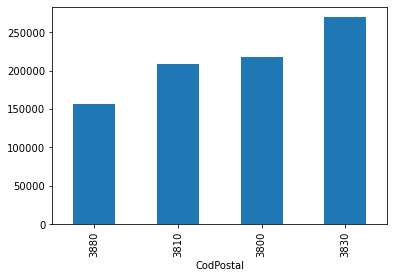

In [44]:
price_by_cod_apart = df_apart.groupby(['CodPostal']).mean()['Price'].sort_values()
price_by_cod_apart.plot(kind='bar')

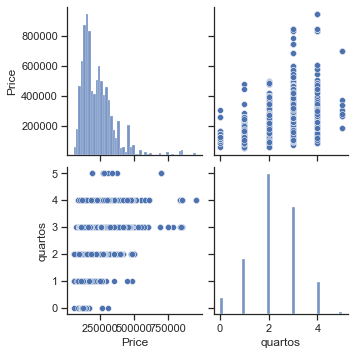

In [53]:
sns.set(style='ticks', color_codes=True)
price_q = df_apart[['Price', 'quartos']]
g=sns.pairplot(price_q)
plt.show()

<AxesSubplot:>

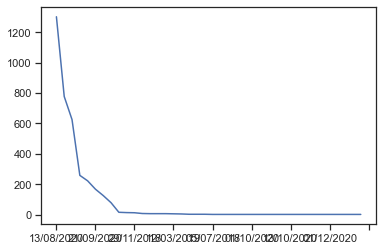

In [57]:
time_apart = df_apart['entry_date'].value_counts()
time_apart.plot.line()

<AxesSubplot:xlabel='CodPostal', ylabel='count'>

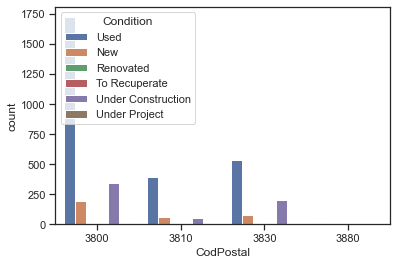

In [69]:
#distribuicao codigo postal por condicao
sns.countplot(x='CodPostal', hue = df_apart['Condition'], data= df_apart)


<AxesSubplot:xlabel='Tipology', ylabel='count'>

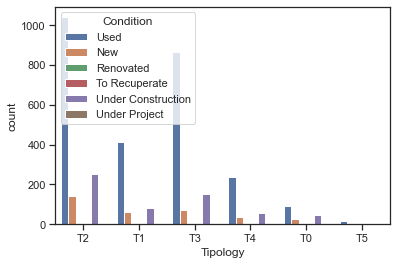

In [68]:
#distribuicao codigo postal por condicao
sns.countplot(x='Tipology', hue = df_apart['Condition'], data= df_apart)


In [71]:
df_apart.corr()

,Price,areas_sqm,euros/sqm,Latitude,Longitude,CodPostal,quartos,Cod_Condition
Price,1.000000,0.576126,0.473093,0.033787,-0.318446,0.158425,0.472994,-0.016733
areas_sqm,0.576126,1.000000,-0.355690,-0.009341,-0.033726,0.125910,0.783656,0.025428
euros/sqm,0.473093,-0.355690,1.000000,0.055396,-0.333286,0.009930,-0.318311,-0.067883
Latitude,0.033787,-0.009341,0.055396,1.000000,-0.046788,-0.173118,0.003365,-0.004941
Longitude,-0.318446,-0.033726,-0.333286,-0.046788,1.000000,-0.650619,0.039764,0.047110
CodPostal,0.158425,0.125910,0.009930,-0.173118,-0.650619,1.000000,0.079993,-0.031546
quartos,0.472994,0.783656,-0.318311,0.003365,0.039764,0.079993,1.000000,0.000606
Cod_Condition,-0.016733,0.025428,-0.067883,-0.004941,0.047110,-0.031546,0.000606,1.000000


correlação > 0.5 : preço e área

#### casas

In [20]:
df_houses.CodPostal.value_counts()

3830    232
3800    176
3810     95
3880     23
Name: CodPostal, dtype: int64

<AxesSubplot:>

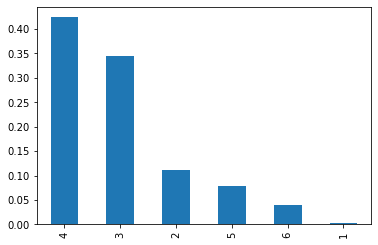

In [36]:
quartos_casas = df_houses.quartos.value_counts()
(quartos_casas/df_houses.shape[0]).plot(kind='bar')#numero de quartos em %

<AxesSubplot:xlabel='quartos'>

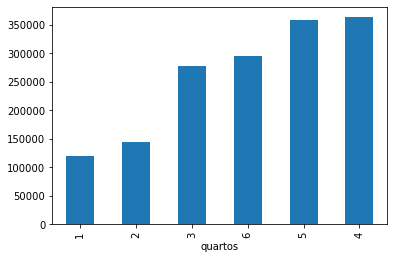

In [45]:
price_by_room_houses = df_houses.groupby(['quartos']).mean()['Price'].sort_values()
price_by_room_houses.plot(kind='bar')

<AxesSubplot:xlabel='Condition'>

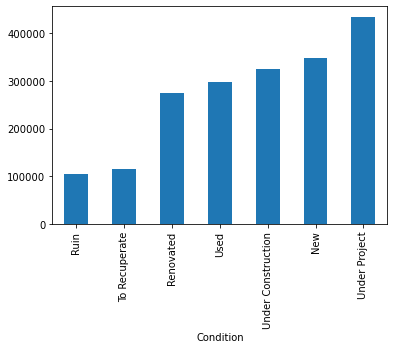

In [46]:
price_by_condition_houses = df_houses.groupby(['Condition']).mean()['Price'].sort_values()
price_by_condition_houses.plot(kind='bar')

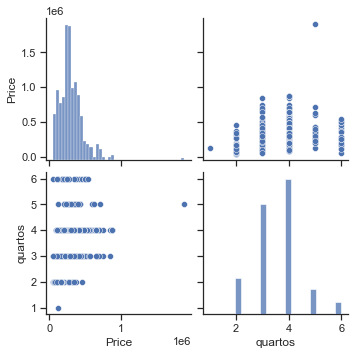

In [54]:
sns.set(style='ticks', color_codes=True)
price_q_h = df_houses[['Price', 'quartos']]
g_h=sns.pairplot(price_q_h)
plt.show()

<AxesSubplot:>

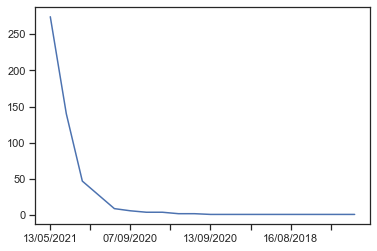

In [58]:
time_houses = df_houses['entry_date'].value_counts()
time_houses.plot.line()

In [70]:
df_houses.corr()

,Price,areas_sqm,euros/sqm,Latitude,Longitude,CodPostal,quartos,Cod_Condition
Price,1.000000,0.421179,0.597996,-0.006461,-0.019743,-0.028545,0.319867,0.102600
areas_sqm,0.421179,1.000000,-0.342211,0.070494,0.074184,0.004959,0.511406,0.077522
euros/sqm,0.597996,-0.342211,1.000000,-0.070499,-0.089258,-0.003625,-0.083244,0.090983
Latitude,-0.006461,0.070494,-0.070499,1.000000,0.944212,-0.292669,0.151604,0.005212
Longitude,-0.019743,0.074184,-0.089258,0.944212,1.000000,-0.303009,0.170952,0.011355
CodPostal,-0.028545,0.004959,-0.003625,-0.292669,-0.303009,1.000000,-0.106384,0.148313
quartos,0.319867,0.511406,-0.083244,0.151604,0.170952,-0.106384,1.000000,0.077960
Cod_Condition,0.102600,0.077522,0.090983,0.005212,0.011355,0.148313,0.077960,1.000000


### Modeling 

#### split into train and test set

## apartamentos

### GradientBoostingRegressor

In [94]:
#define X and y
X = df_apart[['areas_sqm', 'quartos', 'Cod_Condition']]
y = df_apart[['Price']]

In [88]:
X.head()

,areas_sqm,quartos,Cod_Condition
0,96,2,4
1,119,2,4
2,72,2,4
3,90,2,4
4,126,2,6


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [97]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

/Users/anateresaneto/opt/miniconda3/envs/my_env/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor(random_state=0)

In [98]:
predict = reg.predict(X_test)

In [99]:
reg.score(X_test, y_test)

0.5173453341797648

### Lasso

In [101]:
clf = linear_model.Lasso(alpha=0.1)

In [102]:
clf.fit(X_train, y_train)

Lasso(alpha=0.1)

In [103]:
print(clf.coef_)

[ 1406.7158021   7262.46659909 -4273.02328416]


In [104]:
print(clf.intercept_)

[79958.23679956]


In [105]:
clf.score(X_test, y_test)

0.33523148370936084

### Decision Tree Regression

In [114]:
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=np.random.RandomState(1)
)

In [115]:
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

/Users/anateresaneto/opt/miniconda3/envs/my_env/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=300,
                  random_state=RandomState(MT19937) at 0x7F92BBAD8E40)

In [116]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

#### casas

### GradientBoostingRegressor

In [120]:
#define X and y
X = df_houses[['areas_sqm', 'quartos', 'Cod_Condition']]
y = df_houses[['Price']]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [122]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

/Users/anateresaneto/opt/miniconda3/envs/my_env/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor(random_state=0)

In [123]:
predict = reg.predict(X_test)
reg.score(X_test, y_test)

0.17159221451109885

### Lasso

In [124]:
clf = linear_model.Lasso(alpha=0.1)

In [125]:
clf.fit(X_train, y_train)

Lasso(alpha=0.1)

In [126]:
clf.score(X_test, y_test)

0.09856164247903032

### Decision Tree Regression

In [127]:
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=np.random.RandomState(1)
)

In [128]:
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

/Users/anateresaneto/opt/miniconda3/envs/my_env/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=300,
                  random_state=RandomState(MT19937) at 0x7F92DADEF040)

In [129]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)